# Polynomial Regression


## Importing the necessary Libraries and Packages


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump
from matplotlib.markers import MarkerStyle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Importing the csv file as DataFrame


In [19]:
df = pd.read_csv("../../../../Datasets/PointValues.csv")
df.head()

,Points,Values
0,-10.0,-1358
1,-9.5,-1200
2,-9.0,-1000
3,-8.5,-850
4,-8.0,-734


## Exploratory Data Analysis


Formal information about the dataset


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Points  41 non-null     float64
 1   Values  41 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 788.0 bytes


Desciption of the dataset


In [21]:
df.describe()

,Points,Values
count,41.000000,41.000000
mean,0.000000,0.000000
std,5.989574,573.598858
min,-10.000000,-1358.000000
25%,-5.000000,-203.000000
50%,0.000000,0.000000
75%,5.000000,203.000000
max,10.000000,1358.000000


Checking if any null value exists


In [22]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

Columns of the dataset


In [23]:
df.columns

Index(['Points', 'Values'], dtype='object')

Correlations between the variables


In [24]:
df.corr()

,Points,Values
Points,1.000000,0.926989
Values,0.926989,1.000000


## Now taking 2 parts from the dataset

### X: which contains only the <b>Points</b> column<br>Y: which contains only the <b>Values</b> column


In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the data


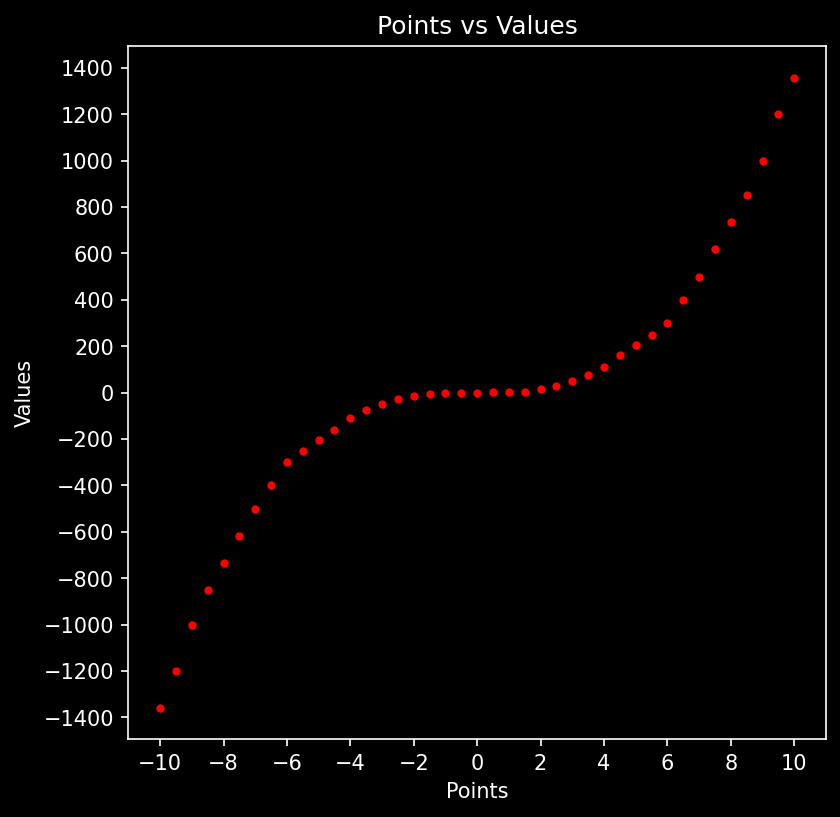

In [26]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
Points = df["Points"]
Values = df["Values"]
plt.scatter(Points, Values, marker=MarkerStyle("."), color="red")
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Points_vs_Values.png", bbox_inches="tight")

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Finding the best degree of n for Polynomial Regression


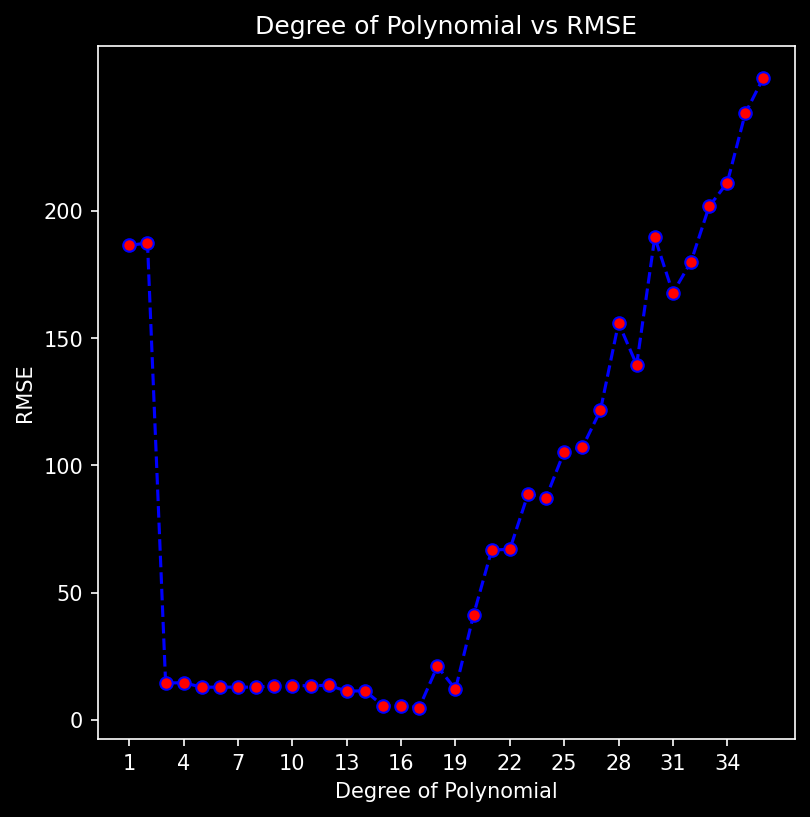

In [28]:
n = X_train.shape[0]
rmse_val = []
for i in range(1, n + 1):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    pred = lin_reg.predict(poly_reg.fit_transform(X_test))
    rmse_val.append(root_mean_squared_error(y_test, pred))
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
plt.plot(
    range(1, n + 1),
    rmse_val,
    linestyle="dashed",
    color="blue",
    marker="o",
    markerfacecolor="red",
)
plt.xticks(np.arange(1, n + 1, 3))
plt.yticks(np.arange(0, 250, 50))
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.title("Degree of Polynomial vs RMSE")
plt.savefig("Images/Degree_of_Polynomial_vs_RMSE.png", bbox_inches="tight")

## Implementation of the Model


In [29]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
y_pred = lin_reg.predict(poly_reg.fit_transform(X_test))

## Performance of the model


In [30]:
print("The coefficient of determination :", r2_score(y_test, y_pred))
adjusted_r2_score = 1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (  # type: ignore
    len(y_test) - X_test.shape[1] - 1
)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9989401276332129
The adjusted coefficient of determination : 0.998586836844284


## Plotting the Regression


### Training Dataset


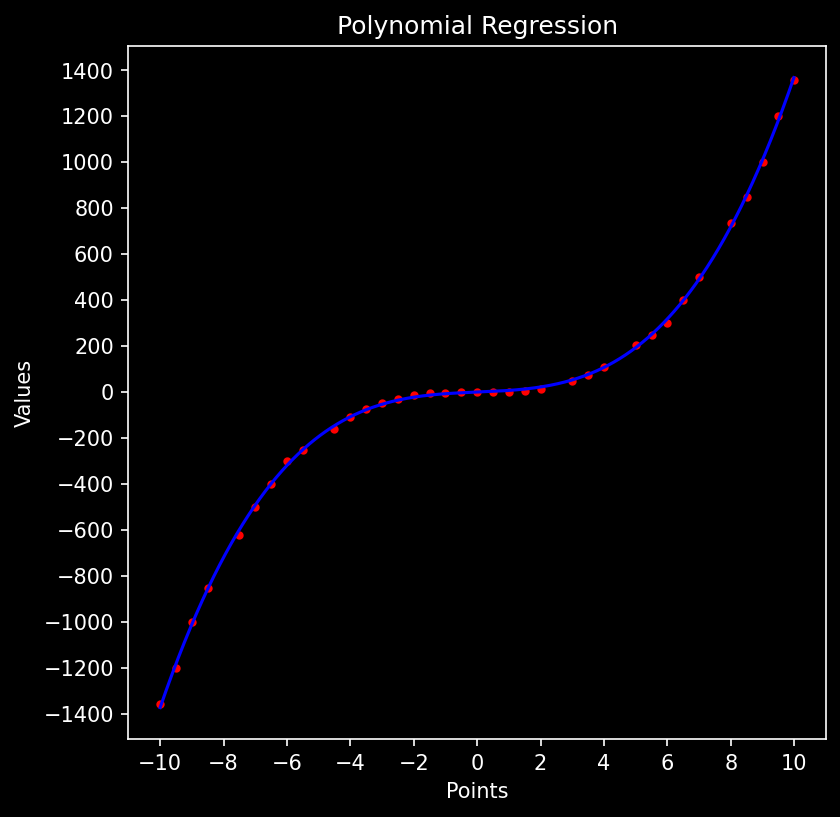

In [31]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_train_grid = np.arange(X_train.min(), X_train.max(), 0.01)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker=MarkerStyle("."), color="red")
plt.plot(
    X_train_grid, lin_reg.predict(poly_reg.fit_transform(X_train_grid)), color="blue"
)
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.xlabel("Points")
plt.ylabel("Values")
plt.title("Polynomial Regression")
plt.savefig("Images/Train_set.png", bbox_inches="tight")

### Test Dataset


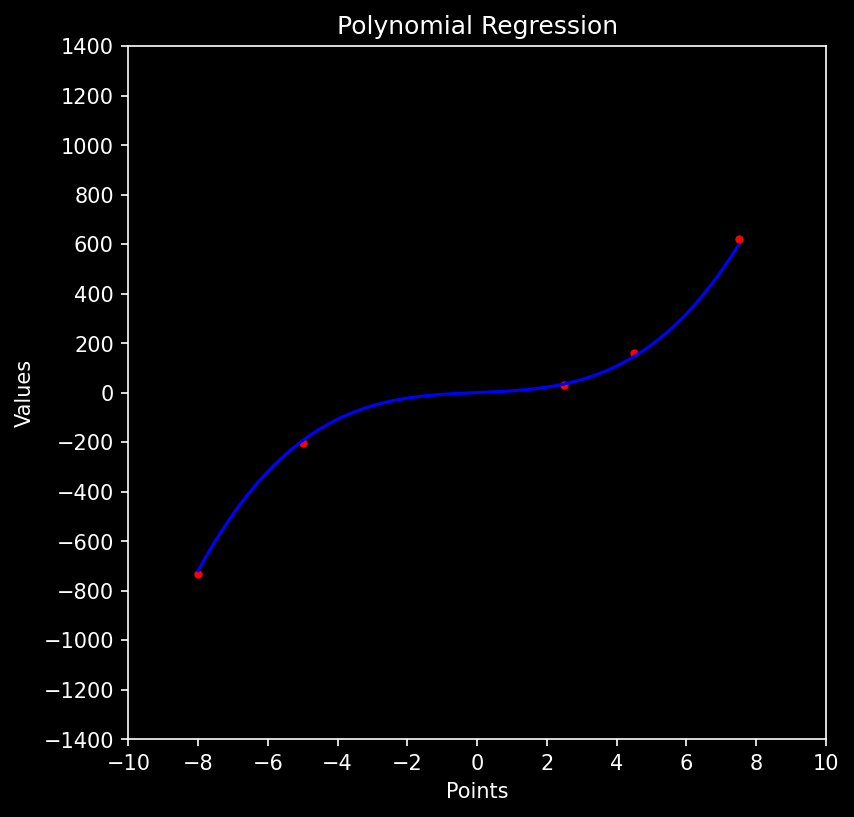

In [32]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use("dark_background")
X_test_grid = np.arange(X_test.min(), X_test.max(), 0.01)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker=MarkerStyle("."), color="red")
plt.plot(
    X_test_grid, lin_reg.predict(poly_reg.fit_transform(X_test_grid)), color="blue"
)
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.xlabel("Points")
plt.ylabel("Values")
plt.title("Polynomial Regression")
plt.savefig("Images/Test_set.png", bbox_inches="tight")

## Additional Performance Metrics


In [33]:
print("Mean Absolute Error (MAE) :", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print(
    "Root Mean Squared Error (RMSE) :",
    root_mean_squared_error(y_test, y_pred),
)
print(
    "Mean Absolute Percentage Error (MAPE) :",
    mean_absolute_percentage_error(y_test, y_pred),
)

Mean Absolute Error (MAE) : 13.371192606323683
Mean Squared Error (MSE) : 209.33098209505732
Root Mean Squared Error (RMSE) : 14.468275021406571
Mean Absolute Percentage Error (MAPE) : 0.0798555164520445


# Saving the Model


In [34]:
dump(lin_reg, "../../../../Models/polynomialRegressor.joblib")

['../../../../Models/polynomialRegressor.joblib']